# 🚗🚓🛺🚕🚙🚌  Predicting the Sale Price of Cars using Machine learning
In this notebook, we're going to attempt predicting the sale price of cars with machine learning while using certain features of the cars


## 1. Problem defintion
> How well can we predict the future sale price of a car, given its characteristics and previous examples of how much similar cars have been sold for?

## 2. Data 
The data used for this project is available on Kaggle at https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

## 3. Evaluation
The evaluation metric for this competion is the RMSE (root mean squared error) between the actuall and the predicted auction prices

## 4. Features
Kaggle provides a data dictionary detailing of all the features of the dataset. You can view this data dictionary at https://www.kaggle.com/nehalbiral/vehicle-dataset-from-cardekho


In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Making our plots appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Load Data

In [2]:
car_price = pd.read_csv('car_data.csv')

## Data Exploration (exploratory data analysis or EDA)
The purpose of EDA is to understand and know more about the dataset we are working on
Things to consider:
 1. The problem(s) / question(s) to be solved.
 2. Findout the kind of data we have and treat them according.
 3. Check if there are missing data and discover the best way to deal with them.
 4. Findout the outliers and consider their significance.
 5. Consider if adding, changing, removing features would help us make optimum use of the data.

In [3]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_price.head().T # Used when there are a lot of columns 

,0,1,2,3,4
Car_Name,ritz,sx4,ciaz,wagon r,swift
Year,2014,2013,2017,2011,2014
Selling_Price,3.35,4.75,7.25,2.85,4.6
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0


In [5]:
car_price.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
# Check the information on the data type of various columns
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [7]:
# list the columns
car_price.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# Show the number of rows and columns
car_price.shape 

(301, 9)

In [9]:
# Show the general descriptive statistic
car_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# getting the unique types 
print(car_price['Seller_Type'].unique())
print(car_price['Owner'].unique())
print(car_price['Transmission'].unique())
print(car_price['Fuel_Type'].unique())

['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [11]:
# Check if there are missing vallues
car_price.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Basic Visualizationand conclusion

''

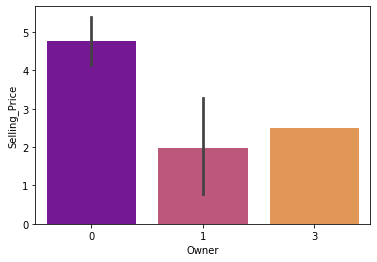

In [12]:
import seaborn as sns
sns.barplot(x = 'Owner', y = 'Selling_Price', data = car_price, palette = 'plasma')
;

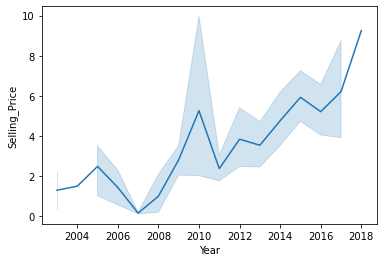

In [13]:
sns.lineplot(x = 'Year', y = 'Selling_Price', data = car_price);

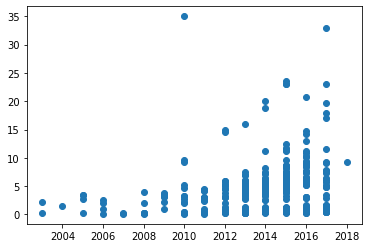

In [14]:
fig, ax = plt.subplots()
ax.scatter(car_price['Year'], car_price['Selling_Price']);

 **From the plot we can see the older the car gets the lower its selling price**

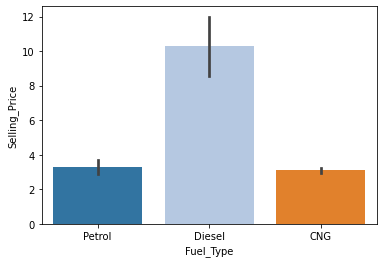

In [15]:
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_price, palette = 'tab20');

**The above visualization shows that cars with fuel_type diesel has the highest selling price while car with fuel_type CNG has the lowest selling_price**

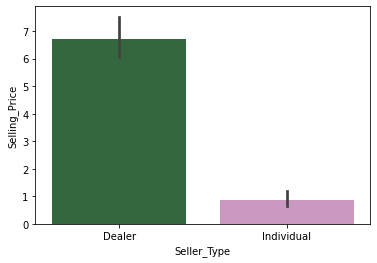

In [16]:
sns.barplot(x = 'Seller_Type', y = 'Selling_Price', data = car_price, palette = 'cubehelix');

**The selling_price with the Dealer is the highest as the can from experience get customers easily when compared with the individual selling_price**

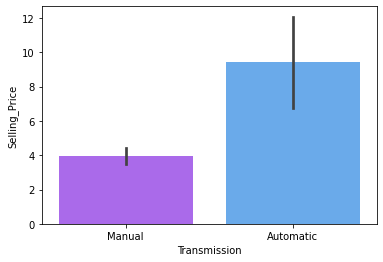

In [17]:
# Comparing selling price for manual and automatic vehicles!
sns.barplot(x = 'Transmission', y = 'Selling_Price', data = car_price, palette = 'cool_r');

**The visualization above shows the mannual cars have the lowest saling price**

# Adding new features columns to the dataset
Adding a new column called `Car_age` to get the age of the car.
We do this by subtracting the year `2021` from the column `Year`.

In [18]:
# Rearranging the columns to make 'Year' the first column
car_price2 = car_price[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [19]:
car_price2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
# Adding a new column
car_price2['Current_year'] = 2020

In [21]:
car_price2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [22]:
car_price2['Car_age'] = car_price2['Current_year'] - car_price2['Year']

In [23]:
car_price2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [24]:
car_price2.tail()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_age
296,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0,2020,3
300,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0,2020,4


## Removing unnecessary features columns
Since we have calculated the `Car_age` with the `Current_year` and `Year`. We are going to remove them as the are no longer needed. 

In [25]:
# Dropping the Current_year
car_price2.drop('Year', axis = 1, inplace = True)
car_price2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [26]:
# Droping the Current_year
car_price2.drop('Current_year', axis = 1, inplace = True)
car_price2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Changing the categorical variables in feature columns.

In [27]:
# Converting categorical variables into indicators
car_price2= pd.get_dummies(car_price2, drop_first = True)

In [28]:
car_price2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [29]:
# Making a correlation matrix
car_price2.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


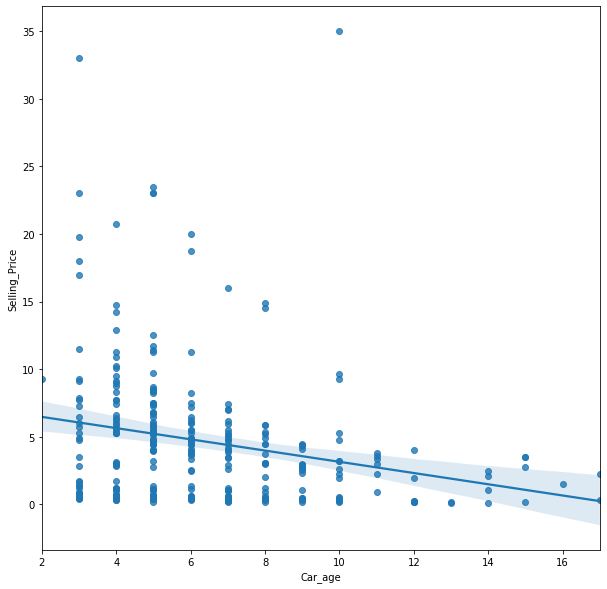

In [30]:
# Plot the Car_age against the Selling_Price
plt.figure(figsize = (10, 10))
sns.regplot(x = 'Car_age', y = 'Selling_Price', data = car_price2);

The above visualization shows that as the age of the car increases the selling price of the car decreases

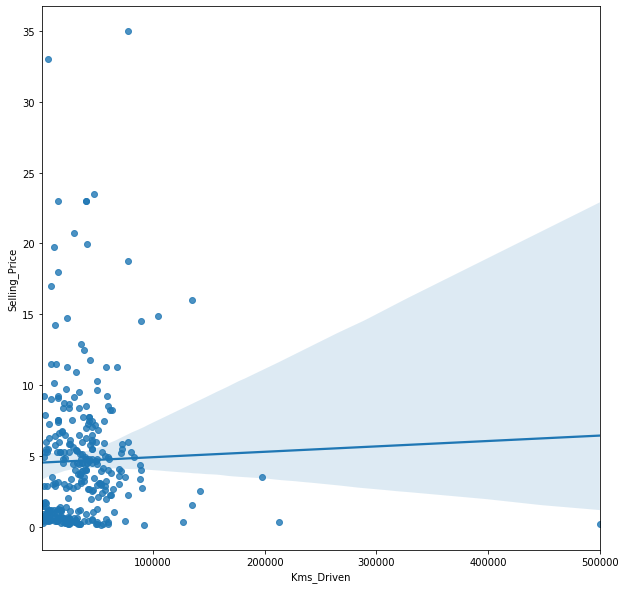

In [31]:
plt.figure(figsize = (10, 10))
sns.regplot( x = 'Kms_Driven', y = 'Selling_Price', data = car_price2);

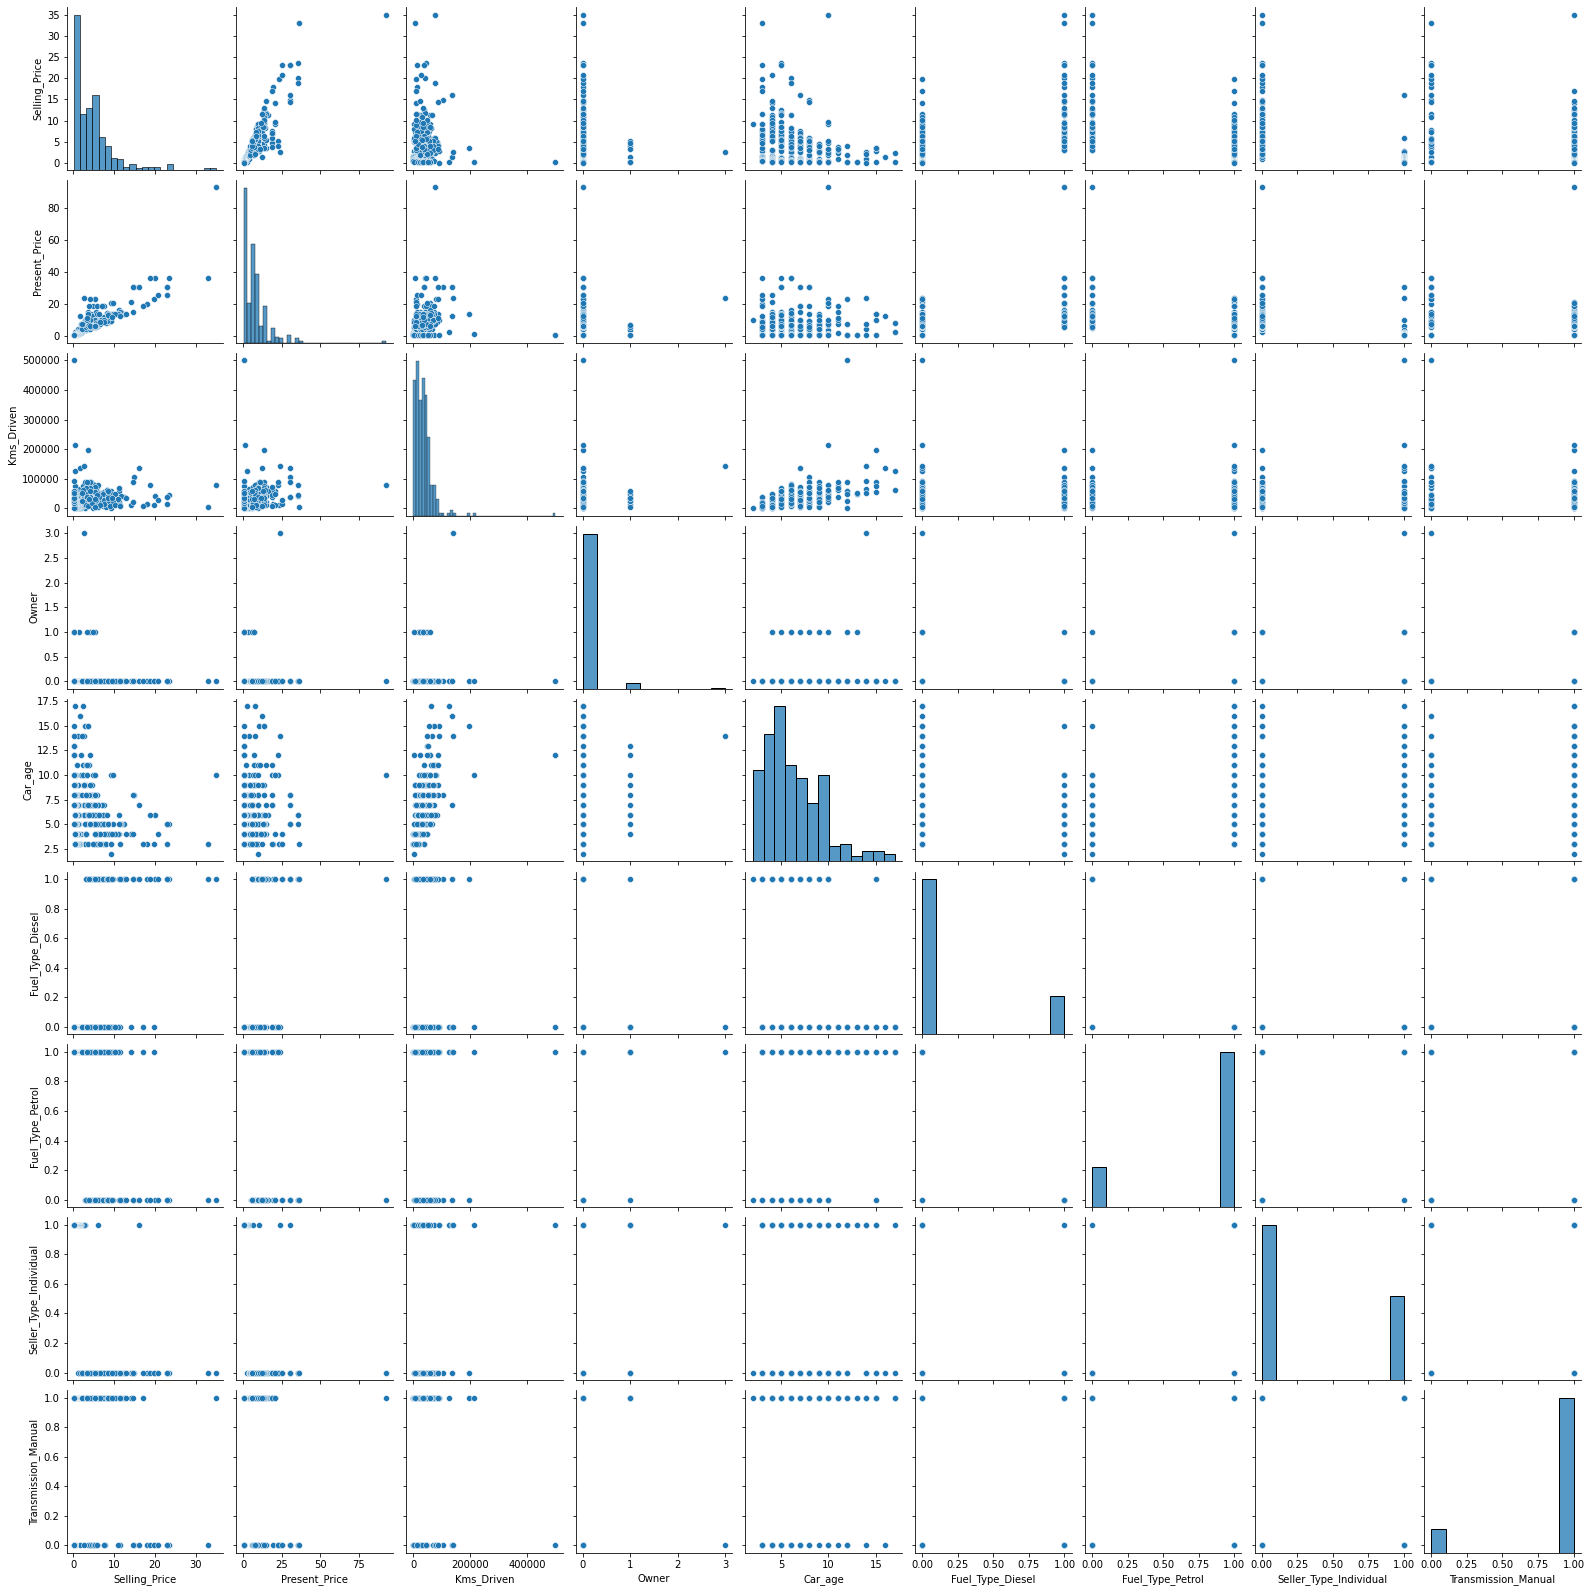

In [32]:
import seaborn as sns
sns.pairplot(car_price2);

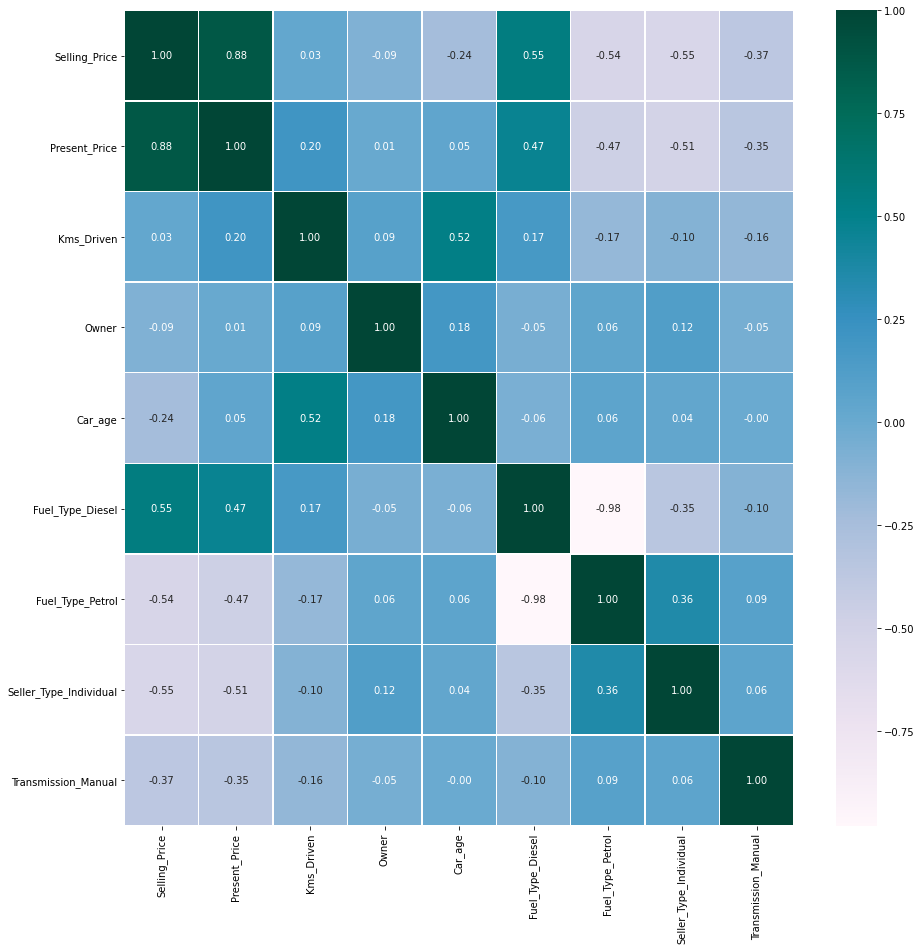

In [33]:
# Making our  correlation matrix more visual
corr_matrix = car_price2.corr()
fig, ax = plt.subplots(figsize = (15, 15))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'PuBuGn');

* **The selling price and present price are highly positively correlated**
* **Fuel type petrol and diesel are negatively correlated**

## 5. Modelling

In [34]:
car_price2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Separate the data in to X feature variable and target label

In [35]:
X = car_price2.drop('Selling_Price', axis = 1)
y = car_price2['Selling_Price']

In [36]:
# Spliting the data into the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
#check the shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [37]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [39]:
# Instantiating the RandomForestRegressor and using it to fit or train the model
baseline_model = RandomForestRegressor(random_state = 42)

# Fiting the model to the training data
baseline_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
X_train

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.750,26000,1,12,0,1,1,1
132,0.950,3500,0,3,0,1,1,1
194,0.787,50000,0,12,0,1,1,1
75,6.800,36000,0,5,0,1,0,1
111,1.500,8700,0,4,0,1,1,1
...,...,...,...,...,...,...,...,...
188,0.570,18000,0,7,0,1,1,1
71,12.480,45000,0,9,1,0,0,1
106,3.450,16500,1,6,0,1,1,1
270,10.000,69341,0,9,0,1,0,1


In [41]:
X_test

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
177,0.57,24000,0,4,0,1,1,0
289,13.60,10980,0,4,0,1,0,1
228,9.40,60000,0,8,1,0,0,1
198,0.57,35000,1,9,0,1,1,1
60,18.61,40001,0,7,0,1,0,1
...,...,...,...,...,...,...,...,...
234,5.70,4492,0,5,0,1,0,1
296,11.60,33988,0,4,1,0,0,1
281,7.60,50456,0,14,0,1,0,1
285,8.50,15059,0,4,0,1,0,0


In [42]:
# Making prediction from our test dataset with the baseline regression model
y_predict = baseline_model.predict(X_test)
y_predict

array([ 0.4413, 11.0303,  4.926 ,  0.2153,  7.7788,  6.215 ,  1.1029,
        0.5832,  0.4679,  6.8875,  7.9429,  1.089 ,  8.3815,  0.4533,
        5.3015,  2.6185,  1.16  , 14.4056,  0.4659,  1.5675,  0.3218,
        8.0817,  4.7445,  2.7125,  0.5009,  3.5105,  5.422 ,  3.224 ,
        1.1927,  1.1718,  0.4097, 10.0095,  0.4578,  2.571 ,  7.9635,
        4.145 ,  6.4694,  6.2842,  2.5555,  6.9505,  4.1616,  3.5759,
        4.9065,  0.5652,  6.049 ,  0.7385,  8.4385,  6.867 ,  2.943 ,
        3.595 ,  4.99  ,  1.4885, 22.5781, 20.9069,  6.284 , 10.6975,
        5.1185,  9.3507,  2.7175,  6.733 ,  0.232 ])

In [43]:
# Evaluate the baseline Regression model on the training data 
baseline_model.score(X_train, y_train)

0.9846462922558309

In [44]:
# Evaluate the baseline Regression model on the test data
baseline_model.score(X_test, y_test)

0.9608898962659107

In [45]:
# Evaluating our baseline Regression model 
print('Baseline Regression model metrics on the the test set')
print(f'R2: {r2_score(y_test, y_predict)}')
print(f'MAE: {mean_absolute_error(y_test, y_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predict))}')


Baseline Regression model metrics on the the test set
R2: 0.9608898962659107
MAE: 0.635359016393443
MSE: 0.9009241001639343
RMSE: 0.949170216643956


In [46]:
# Using functions to evaluate our baseline model
def rmse(y_test, y_predict):
    '''
    Calculates root mean squared error between predictions and true lables
    '''
    return np.sqrt(mean_squared_error(y_test, y_predict))

# Creat a function to evaluate baseline model on a few different level
def show_scores(y_test, y_predict):
    y_predict = baseline_model.predict(X_test)
    score_dictionary = {'R2': r2_score(y_test, y_predict),
                        'MAE': mean_absolute_error(y_test, y_predict),
                        'MSE': mean_squared_error(y_test, y_predict),
                        'RMSE': rmse(y_test, y_predict),
                        }
    return score_dictionary

In [47]:
show_scores(y_test, y_predict)

{'R2': 0.9608898962659107,
 'MAE': 0.635359016393443,
 'MSE': 0.9009241001639343,
 'RMSE': 0.949170216643956}

## Improving Our model
* We trained and evaluate our dataset on the baseline model.
* We would try to see if we would get better result by tuning hyperparametes on our model

In [165]:
# Randomized search CV

# To select the number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in the trees
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to splot a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4] 

In [166]:
from sklearn.model_selection import RandomizedSearchCV 
# Used to find the best parameters

# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 4]}


In [167]:
# Setup RandomizedSearchCV
tuned_model =RandomizedSearchCV(estimator = baseline_model,
                       param_distributions = random_grid,
                       scoring = 'neg_mean_squared_error',
                       n_iter = 10, 
                       cv = 5,
                       verbose = 2, 
                       random_state = 42,
                       n_jobs = -1)

In [168]:
# Fit the RandomizedSearchCV version of the tuned_model
tuned_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [169]:
# Making predicitons on our test dataset with the tuned hyperparameters
new_prediction = tuned_model.predict(X_test)
new_prediction

array([ 0.43426867, 10.98474006,  4.88367372,  0.21852283,  7.72579864,
        6.34989757,  1.09530016,  0.5892466 ,  0.4661905 ,  6.65765585,
        8.02803362,  1.07277813,  8.16277095,  0.45788478,  5.28949524,
        2.68959752,  1.14252208, 14.27134702,  0.46815948,  1.5803003 ,
        0.34641878,  8.04250402,  4.70114942,  2.78168029,  0.51228312,
        3.50543829,  5.31446438,  3.12639076,  1.19275988,  1.17028134,
        0.43690574, 10.05386189,  0.46118885,  2.60402247,  7.78027717,
        4.20376181,  6.21149453,  6.42986334,  2.63305526,  6.96848066,
        4.27455903,  3.57514384,  4.97164705,  0.56050967,  6.18047049,
        0.76893666,  8.44963381,  6.54628897,  2.92209164,  3.59052892,
        5.01636066,  1.54863714, 21.73767846, 20.7796019 ,  6.44079509,
       10.45747806,  5.08333343,  9.06672633,  2.69991533,  6.79756363,
        0.23884032])

In [170]:
# Evaluate the predictions
print('Tuned Regression model metrics on the the test set')
print(f'R2: {r2_score(y_test, new_prediction)}')
print(f'MAE: {mean_absolute_error(y_test, new_prediction)}')
print(f'MSE: {mean_squared_error(y_test, new_prediction)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, new_prediction))}')


Tuned Regression model metrics on the the test set
R2: 0.9598277399216882
MAE: 0.6361705471281913
MSE: 0.9253914924050325
RMSE: 0.9619727087631086


In [171]:
# Find the best model hyperparameters
tuned_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [172]:
%%time
# MOst ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 400,
                                    min_samples_split = 4,
                                    min_samples_leaf = 1,
                                    max_features = 'auto',
                                    n_jobs = -1,
                                    max_depth = 30,
                                    max_samples = None)
ideal_model.fit(X_train, y_train)

Wall time: 1.96 s


RandomForestRegressor(max_depth=30, min_samples_split=4, n_estimators=400,
                      n_jobs=-1)

In [173]:
new_pred = ideal_model.predict(X_test)
new_pred

array([ 0.43337412, 10.83132112,  4.85901247,  0.22008991,  7.63758813,
        6.46584053,  1.10890436,  0.5938447 ,  0.47186294,  6.67571667,
        7.97609455,  1.09026498,  8.23628284,  0.46070891,  5.24597098,
        2.60337173,  1.15351914, 14.11859101,  0.4726212 ,  1.58831528,
        0.35235048,  8.06232653,  4.69829595,  2.7577253 ,  0.51484167,
        3.59384097,  5.29112161,  3.14617108,  1.20784   ,  1.17145176,
        0.42326427, 10.09112197,  0.46437128,  2.65066488,  7.79882189,
        4.21178501,  5.98849747,  6.23968925,  2.61136096,  6.7980837 ,
        4.18292297,  3.55777824,  4.94942703,  0.56117843,  6.19802391,
        0.78428447,  8.41118616,  6.98222966,  2.8745682 ,  3.6752958 ,
        4.9140272 ,  1.5463301 , 21.59590461, 20.9621392 ,  6.6007301 ,
       10.35284838,  5.10181245,  8.91105509,  2.72263373,  6.86769718,
        0.2404212 ])

In [174]:
# Evaluate the predictions on the best hyperparameter model
print('Best hyperparameter Regression model metrics on the the test set')
print(f'R2: {r2_score(y_test, new_pred)}')
print(f'MAE: {mean_absolute_error(y_test, new_pred)}')
print(f'MSE: {mean_squared_error(y_test, new_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, new_pred))}')


Best hyperparameter Regression model metrics on the the test set
R2: 0.9602869421705807
MAE: 0.63573572856788
MSE: 0.9148135001887608
RMSE: 0.9564588335044854


## Comparing the Baseline Model, the Tuned Model and the Best hyperparameter model ( Ideal_model)

In [175]:
# Baselin Regression model
Baseline = show_scores(y_test, y_predict)
Baseline

{'R2': 0.9608898962659107,
 'MAE': 0.635359016393443,
 'MSE': 0.9009241001639343,
 'RMSE': 0.949170216643956}

In [176]:
def new_model (y_test, new_prediction):
    new_dict = ({'R2':r2_score(y_test, new_prediction),
                 'MAE': mean_absolute_error(y_test, new_prediction),
                 'MSE': mean_squared_error(y_test, new_prediction),
                 'RMSE': (np.sqrt(mean_squared_error(y_test, new_prediction)))})
    return new_dict

In [177]:
# Tuned Regression model
Tuned = new_model(y_test, new_prediction)
Tuned

{'R2': 0.9598277399216882,
 'MAE': 0.6361705471281913,
 'MSE': 0.9253914924050325,
 'RMSE': 0.9619727087631086}

In [178]:
# Ideal Regression model

def idl_model(y_test, new_pred):
    dictionary = ({'R2': r2_score(y_test, new_pred),
                   'MAE': mean_absolute_error(y_test, new_pred),
                   'MSE': mean_squared_error(y_test, new_pred),
                   'RMSE': (np.sqrt(mean_squared_error(y_test, new_pred)))})
    return dictionary

In [179]:
Ideal = idl_model(y_test, new_pred)
Ideal

{'R2': 0.9602869421705807,
 'MAE': 0.63573572856788,
 'MSE': 0.9148135001887608,
 'RMSE': 0.9564588335044854}

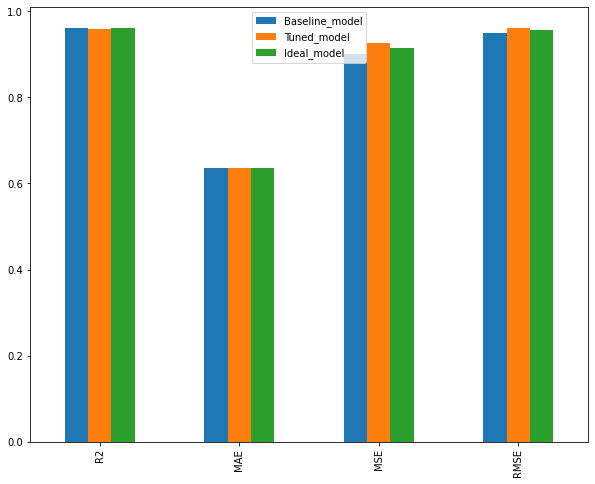

In [180]:
# Comparing with baselin model
compare_metrics = pd.DataFrame({'Baseline_model': Baseline,
                                'Tuned_model': Tuned,
                                 'Ideal_model': Ideal})
compare_metrics.plot.bar(figsize = (10, 8));

c:\users\chukw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


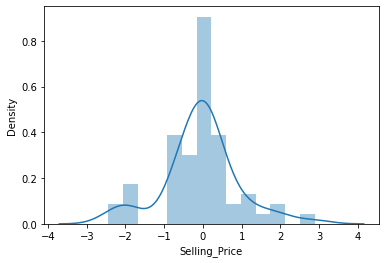

In [181]:
# PLotting the difference between the actual and predicted values
sns.distplot(y_test-new_pred);

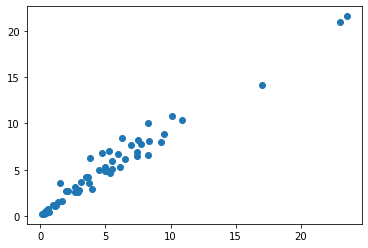

In [182]:
plt.scatter(y_test, new_pred);

## Find the feature of importance

In [183]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.8934417 , 0.03262139, 0.00090881, 0.05628572, 0.00257191,
       0.00350194, 0.00251548, 0.00815305])

* Present price has the highest featuer importance

In [186]:
# Helper function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({'features': columns,
                        'feature_importance': importances})
          .sort_values('feature_importance', ascending = False)
          .reset_index(drop = True))
    
    sns.barplot(x = 'feature_importance',
                y = 'features',
                data = df,
                orient = 'h')
    

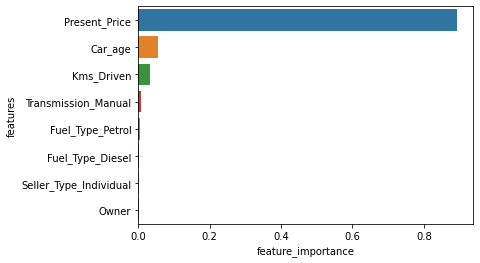

In [187]:
plot_features(X_train.columns, ideal_model.feature_importances_)

#### The above horizontal bar plot show that 'Present_price' is the feature with the most significance

In [191]:
# Best hyperparameter
Ideal = idl_model(y_test, new_pred)
Ideal

{'R2': 0.9602869421705807,
 'MAE': 0.63573572856788,
 'MSE': 0.9148135001887608,
 'RMSE': 0.9564588335044854}

#### The R2 Score here is 0.96 and this is quite good.

## Results 

In [195]:
result_df = pd.DataFrame({'Real Values': y_test,
                          'Best Predicted Values': new_pred}
                          )
result_df.head()

,Real Values,Best Predicted Values
177,0.35,0.433374
289,10.11,10.831321
228,4.95,4.859012
198,0.15,0.220090
60,6.95,7.637588


We can observe here that the values predicted are quite near to the actual values so this model is quite acceptable

# Storing in a Pickle file

In [196]:
import pickle
# open a file to store this data

carprice = open('Carpricemodel.pkl', 'wb') # wb--> Writebook

# dumping the information to this file
pickle.dump(ideal_model, carprice)